In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sc.settings.verbosity = 3           
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.5 anndata==0.10.2 umap==0.5.4 numpy==1.25.2 scipy==1.11.3 pandas==2.1.1 scikit-learn==1.3.1 statsmodels==0.14.0 igraph==0.10.8 pynndescent==0.5.10


In [3]:
results_file = 'write/GSE167186_QC.h5ad'

In [4]:
adata_1 = sc.read_10x_h5('GSM5098737_HM1_filtered_feature_bc_matrix.h5')
adata_2 = sc.read_10x_h5('GSM5098738_HM2_filtered_feature_bc_matrix.h5')
adata_3 = sc.read_10x_h5('GSM5098739_HM3_filtered_feature_bc_matrix.h5')
adata_4 = sc.read_10x_h5('GSM5098740_HM4_filtered_feature_bc_matrix.h5')
adata_5 = sc.read_10x_h5('GSM5098741_HM5_filtered_feature_bc_matrix.h5')
adata_6 = sc.read_10x_h5('GSM5098742_HM6_filtered_feature_bc_matrix.h5')
adata_7 = sc.read_10x_h5('GSM5098743_HM7_filtered_feature_bc_matrix.h5')
adata_8 = sc.read_10x_h5('GSM5098744_HM8_filtered_feature_bc_matrix.h5')
adata_9 = sc.read_10x_h5('GSM5098745_HM9_filtered_feature_bc_matrix.h5')
adata_10 = sc.read_10x_h5('GSM5098746_HM10_filtered_feature_bc_matrix.h5')
adata_11 = sc.read_10x_h5('GSM5098747_HM11_filtered_feature_bc_matrix.h5')
adata_12 = sc.read_10x_h5('GSM5098748_HM12_filtered_feature_bc_matrix.h5')
adata_13 = sc.read_10x_h5('GSM5098749_HM13_filtered_feature_bc_matrix.h5')
adata_15 = sc.read_10x_h5('GSM5098750_HM15_filtered_feature_bc_matrix.h5')
adata_21 = sc.read_10x_h5('GSM5098751_HM21_filtered_feature_bc_matrix.h5')
adata_22 = sc.read_10x_h5('GSM5098752_HM22_filtered_feature_bc_matrix.h5')
adata_23 = sc.read_10x_h5('GSM5098753_HM23_filtered_feature_bc_matrix.h5')

reading GSM5098737_HM1_filtered_feature_bc_matrix.h5
 (0:00:00)
reading GSM5098738_HM2_filtered_feature_bc_matrix.h5
 (0:00:00)
reading GSM5098739_HM3_filtered_feature_bc_matrix.h5
 (0:00:00)
reading GSM5098740_HM4_filtered_feature_bc_matrix.h5
 (0:00:00)
reading GSM5098741_HM5_filtered_feature_bc_matrix.h5


/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  

 (0:00:00)
reading GSM5098742_HM6_filtered_feature_bc_matrix.h5
 (0:00:00)
reading GSM5098743_HM7_filtered_feature_bc_matrix.h5
 (0:00:00)
reading GSM5098744_HM8_filtered_feature_bc_matrix.h5
 (0:00:00)
reading GSM5098745_HM9_filtered_feature_bc_matrix.h5


/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  

 (0:00:00)
reading GSM5098746_HM10_filtered_feature_bc_matrix.h5
 (0:00:00)
reading GSM5098747_HM11_filtered_feature_bc_matrix.h5
 (0:00:00)
reading GSM5098748_HM12_filtered_feature_bc_matrix.h5
 (0:00:00)
reading GSM5098749_HM13_filtered_feature_bc_matrix.h5


/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  

 (0:00:00)
reading GSM5098750_HM15_filtered_feature_bc_matrix.h5
 (0:00:00)
reading GSM5098751_HM21_filtered_feature_bc_matrix.h5


/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading GSM5098752_HM22_filtered_feature_bc_matrix.h5


/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading GSM5098753_HM23_filtered_feature_bc_matrix.h5


/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)


/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
adata_1.var_names_make_unique() 
adata_2.var_names_make_unique() 
adata_3.var_names_make_unique() 
adata_4.var_names_make_unique() 
adata_5.var_names_make_unique() 
adata_6.var_names_make_unique() 
adata_7.var_names_make_unique() 
adata_8.var_names_make_unique() 
adata_9.var_names_make_unique() 
adata_10.var_names_make_unique() 
adata_11.var_names_make_unique() 
adata_12.var_names_make_unique() 
adata_13.var_names_make_unique() 
adata_15.var_names_make_unique() 
adata_21.var_names_make_unique() 
adata_22.var_names_make_unique() 
adata_23.var_names_make_unique() 

In [6]:
young = adata_5

young = young.concatenate(adata_8)
young = young.concatenate(adata_10)
young = young.concatenate(adata_13)
young = young.concatenate(adata_21)
young = young.concatenate(adata_22)

young

# AnnData object with n_obs × n_vars = 48263 × 33538
#     obs: 'batch'
#     var: 'gene_ids', 'feature_types', 'genome'

/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1823: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1823: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1823: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/opt/homebrew/lib/python3.11/site-pac

AnnData object with n_obs × n_vars = 48263 × 33538
    obs: 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [7]:
old = adata_1

old = old.concatenate(adata_2)
old = old.concatenate(adata_3)
old = old.concatenate(adata_4)
old = old.concatenate(adata_6)
old = old.concatenate(adata_7)
old = old.concatenate(adata_9)
old = old.concatenate(adata_11)
old = old.concatenate(adata_12)
old = old.concatenate(adata_15)
old = old.concatenate(adata_23)

old

# AnnData object with n_obs × n_vars = 86223 × 33538
#     obs: 'batch'
#     var: 'gene_ids', 'feature_types', 'genome'

/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1823: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1823: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1823: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/opt/homebrew/lib/python3.11/site-pac

AnnData object with n_obs × n_vars = 86223 × 33538
    obs: 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [8]:
adata = young.concatenate(old)
adata

# AnnData object with n_obs × n_vars = 134486 × 33538
#     obs: 'batch'
#     var: 'gene_ids', 'feature_types', 'genome'

/opt/homebrew/lib/python3.11/site-packages/anndata/_core/anndata.py:1823: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


AnnData object with n_obs × n_vars = 134486 × 33538
    obs: 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

normalizing counts per cell
    finished (0:00:00)


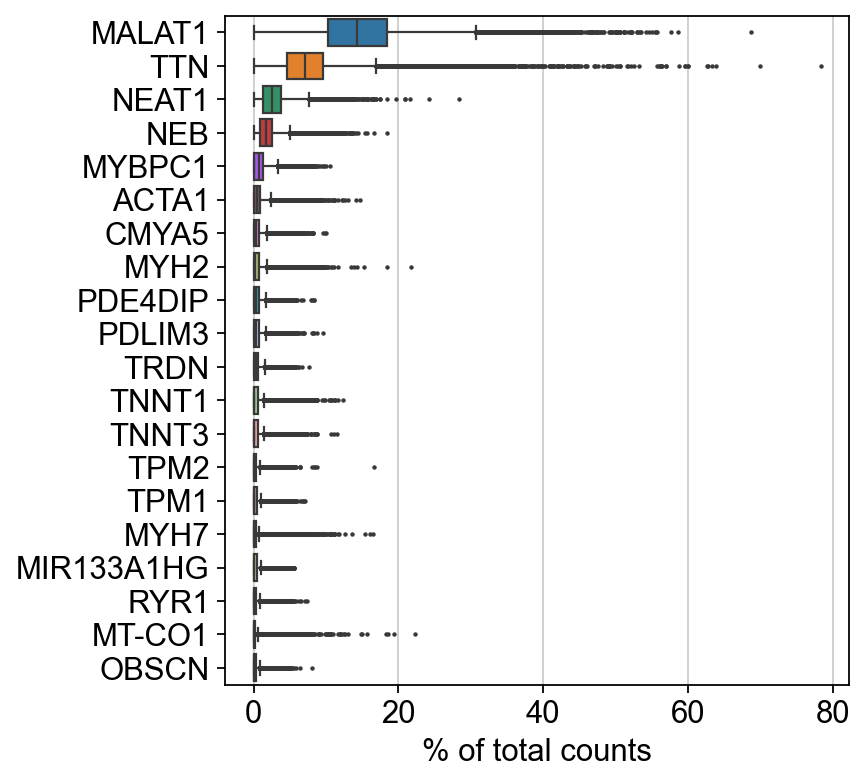

In [9]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [10]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

# filtered out 78219 cells that have less than 200 genes expressed
# filtered out 10277 genes that are detected in less than 3 cells

filtered out 78219 cells that have less than 200 genes expressed
filtered out 10277 genes that are detected in less than 3 cells


In [11]:
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

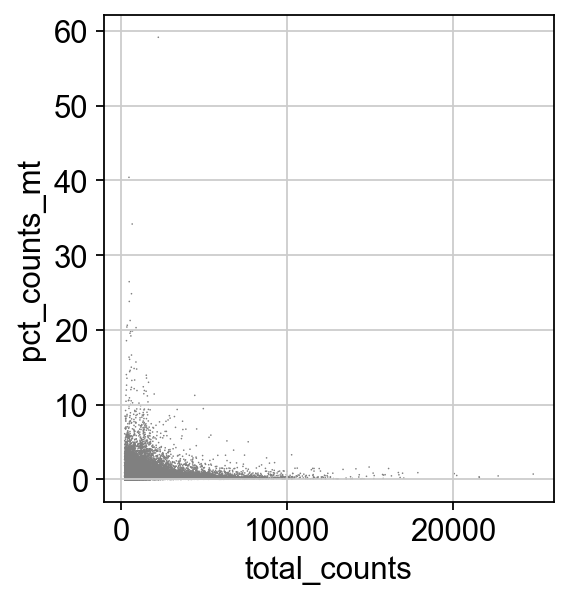

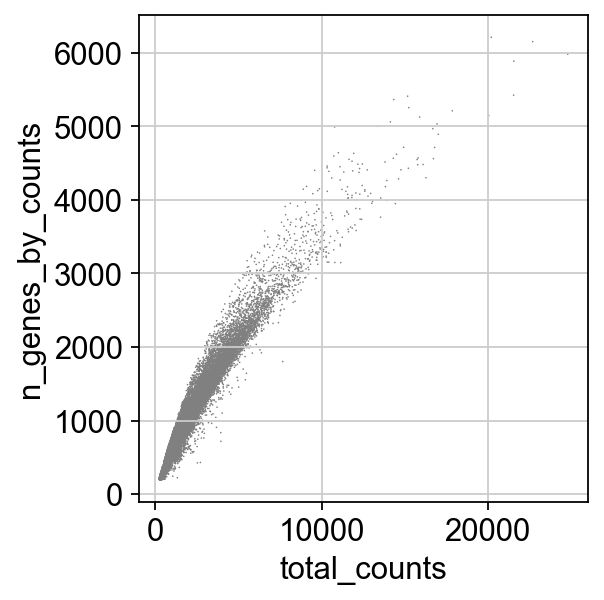

In [13]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [14]:
adata = adata[adata.obs.n_genes_by_counts < 3500, :]
adata = adata[adata.obs.pct_counts_mt < 10, :]

In [15]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


/opt/homebrew/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [16]:
sc.pp.log1p(adata)

In [17]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/opt/homebrew/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [18]:
adata.raw = adata

In [19]:
adata = adata[:, adata.var.highly_variable]

In [20]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use


/opt/homebrew/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:619: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if keys[0] in adata.obs_keys() and is_categorical_dtype(adata.obs[keys[0]]):


    finished (0:00:58)


In [21]:
sc.pp.scale(adata, max_value=10)

In [22]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:37)


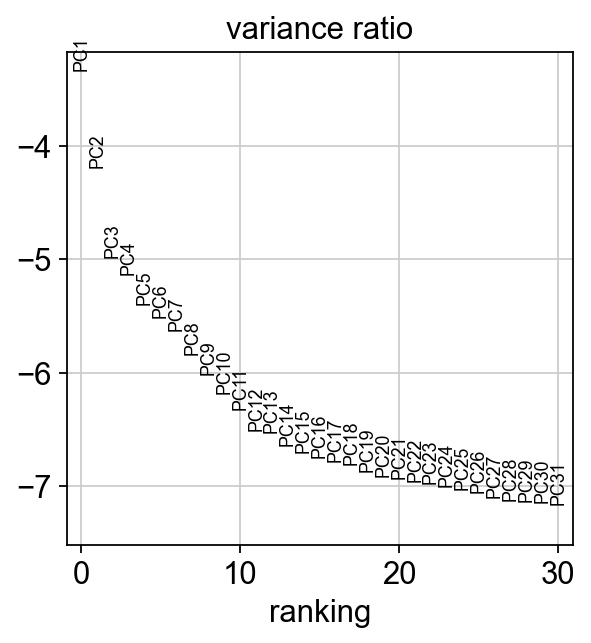

In [23]:
sc.pl.pca_variance_ratio(adata, log=True)

In [24]:
adata.write(results_file)

In [25]:
adata

# AnnData object with n_obs × n_vars = 56049 × 2724
#     obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
#     var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
#     uns: 'log1p', 'hvg', 'pca'
#     obsm: 'X_pca'
#     varm: 'PCs'

AnnData object with n_obs × n_vars = 56049 × 2724
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [27]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:08)


In [29]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:20)


In [30]:
sc.tl.leiden(adata)

# found 19 clusters and added

running Leiden clustering
    finished: found 19 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:27)


In [31]:
adata.write(results_file)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:05)


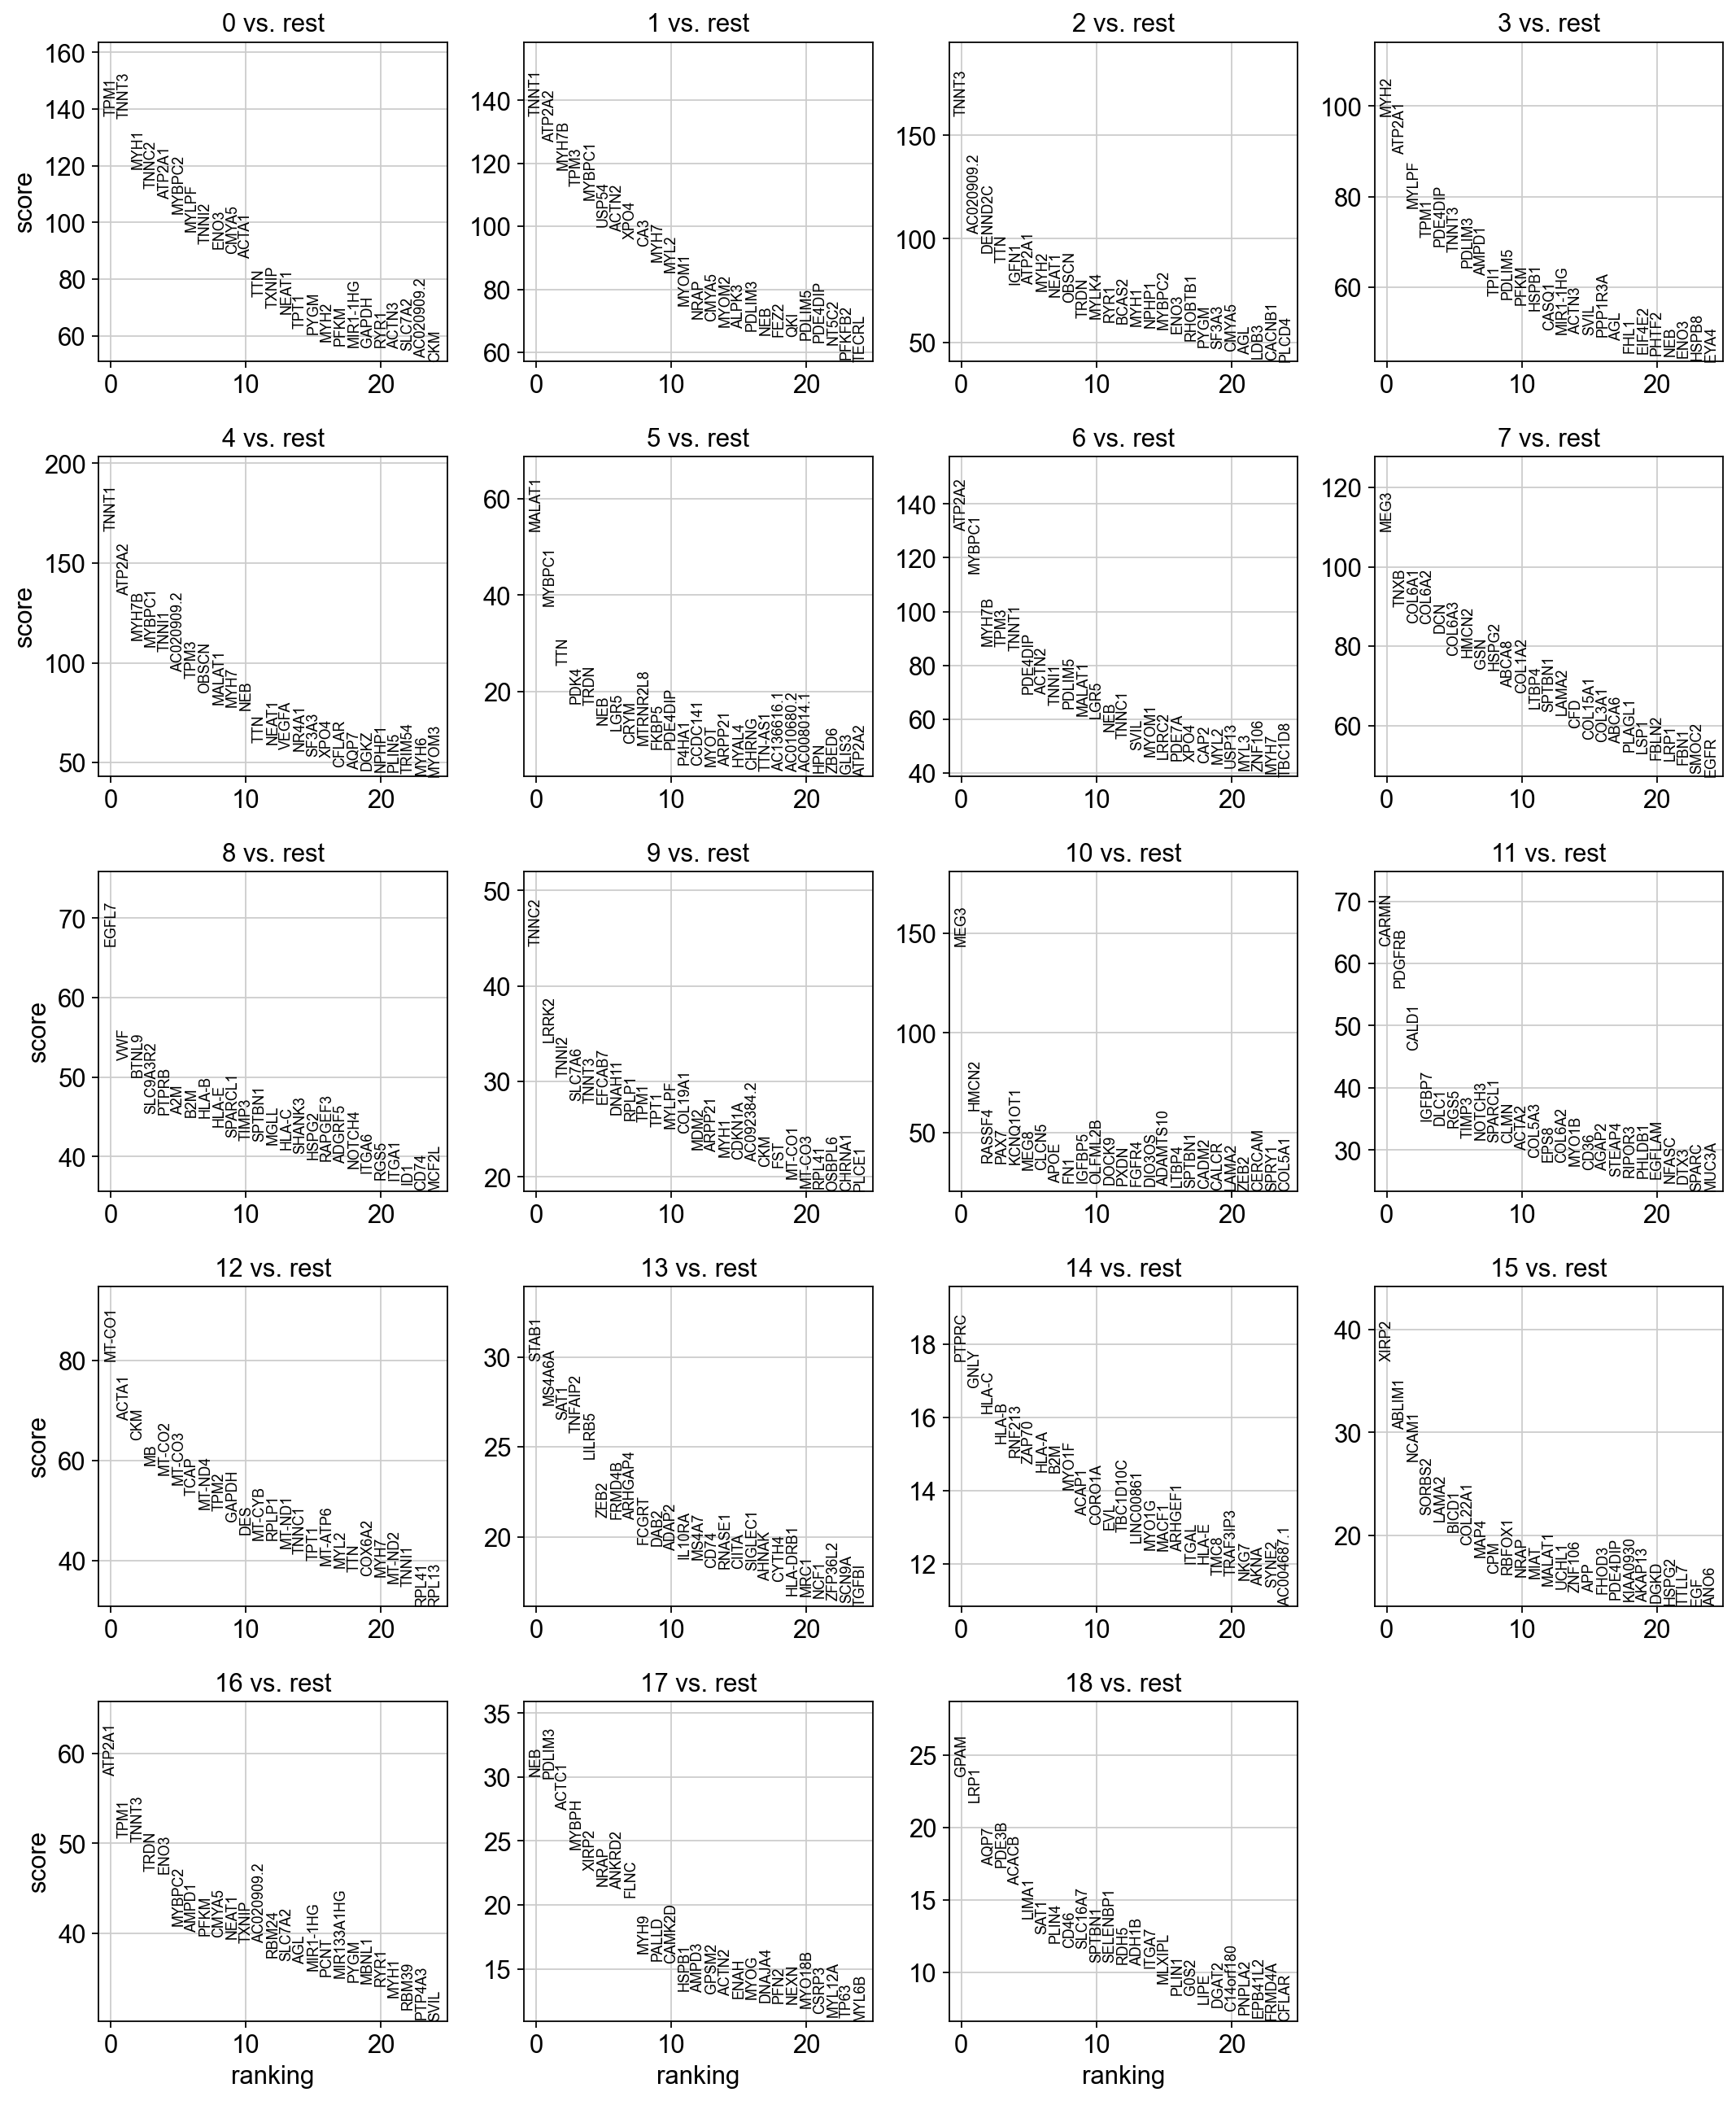

In [32]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [33]:
adata.write(results_file)